### Importing Packages

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import numpy as np
from collections import defaultdict
from tqdm.notebook import tqdm

In [2]:
# CHEMBl SDF file containing molecules
sdf_file = "chembl_35.sdf"
num_to_extract = 1000 

supplier = Chem.SDMolSupplier(sdf_file)

In [ ]:
# This will probably talk a few minutes
print("Number of molecules", len(supplier))

Number of molecules 2474590


Defining Properties

In [7]:
def prop_from_smiles(mol):
    """Extract comprehensive properties from an RDKit molecule"""
    if mol is None:
        return None
    
    properties = {}
    
    # Basic molecular properties

    properties['SMILES'] = Chem.MolToSmiles(mol)
    properties['Molecular_Formula'] = Chem.rdMolDescriptors.CalcMolFormula(mol)
    properties['Molecular_Weight'] = Descriptors.MolWt(mol)
    properties['Heavy_Atom_Count'] = mol.GetNumHeavyAtoms()
    properties['Atom_Count'] = mol.GetNumAtoms()
    properties['Bond_Count'] = mol.GetNumBonds()
    properties['Ring_Count'] = rdMolDescriptors.CalcNumRings(mol)
    properties['Aromatic_Ring_Count'] = rdMolDescriptors.CalcNumAromaticRings(mol)
    
    # Drug-likeness
    properties['LogP'] = Descriptors.MolLogP(mol)
    
    return properties


In [12]:
properties = []

num_to_extract = 1000
counts = 0


print("Extracting molecular properties")
count = 0
for mol in tqdm(supplier, desc="Processing molecules", total=num_to_extract):
    if mol is None:
        continue
    
    mol_props = prop_from_smiles(mol)
    if mol_props:
        properties.append(mol_props)
        
    
    count += 1
    if count >= num_to_extract:
        break

# Create DataFrame
mol_prop_df = pd.DataFrame(properties)

Extracting molecular properties


Processing molecules:   0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
mol_prop_df

,SMILES,Molecular_Formula,Molecular_Weight,Heavy_Atom_Count,Atom_Count,Bond_Count,Ring_Count,Aromatic_Ring_Count,LogP
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,C10H13N5S,235.316,16,16,17,2,2,1.36192
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,C123H212N44O34S,2883.390,202,202,204,3,1,-16.66110
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,C160H268N50O41,3548.213,251,251,254,4,3,-12.19580
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,C124H154ClN21O39,2598.157,185,185,196,12,9,-5.58640
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,C19H21BrN6O,429.322,27,27,30,4,3,3.27500
...,...,...,...,...,...,...,...,...,...
995,COc1ccc(/C=C/C(=O)O[C@@H]2[C@H](O)[C@@H](O[C@@...,C70H104O32,1457.570,102,102,112,11,1,-2.22740
996,Cc1cn([C@@H]2O[C@@]3(COP(O)(=S)O[C@H]4[C@H]5OC...,C140H176N49O83P13S13,4692.741,298,298,334,37,19,-14.80060
997,N=C(N)N1CCC[C@H]1Cc1nc(-c2ccc(Nc3nc(-c4cccc(F)...,C23H22FN7OS,463.542,33,33,37,5,4,4.64317
998,Cl.Clc1cccc2nn(N=C3NCCN3)cc12,C10H11Cl2N5,272.139,17,17,18,3,2,1.42340


Visualizing some of the molecules

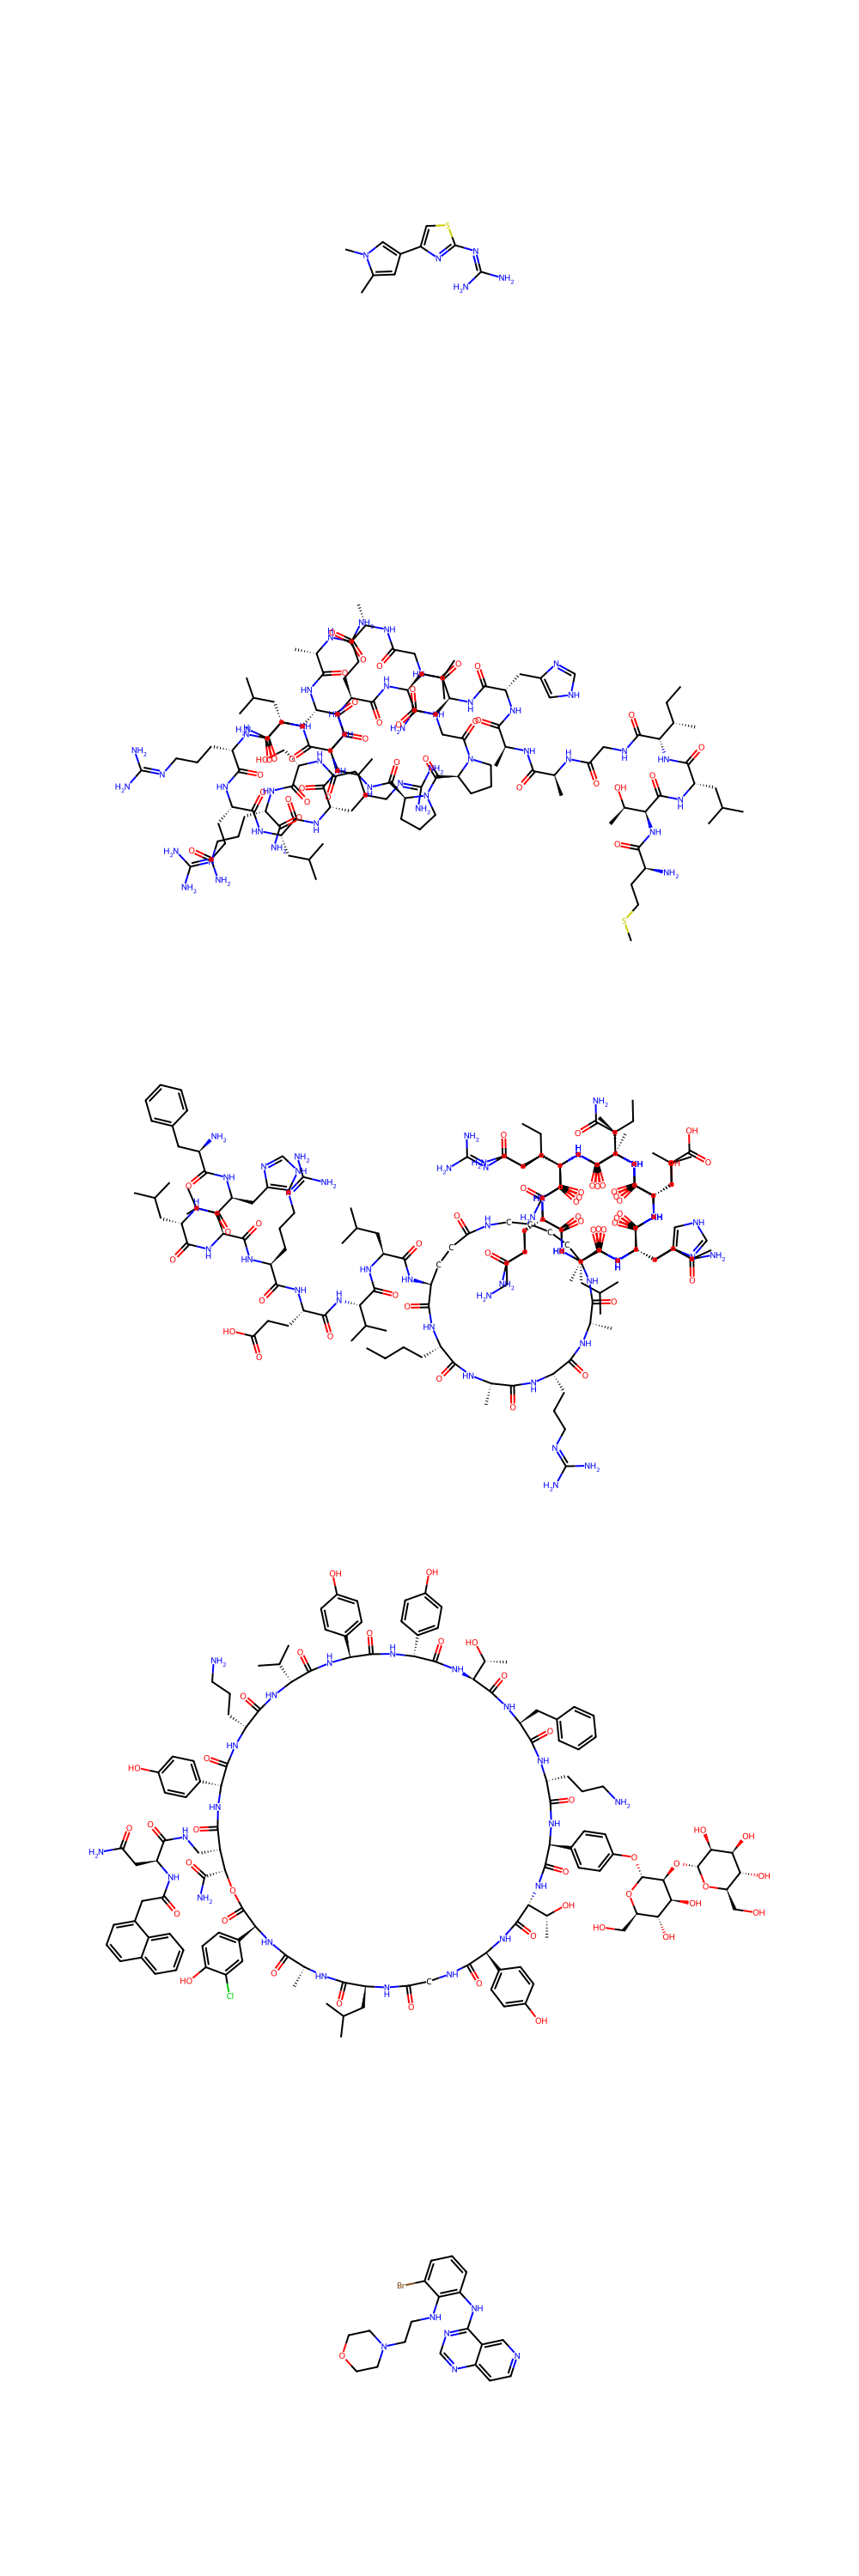

In [14]:
from rdkit.Chem import Draw

example_mols = [Chem.MolFromSmiles(smiles) for smiles in mol_prop_df[:5]['SMILES']]

img = Draw.MolsToGridImage(example_mols, molsPerRow=1, subImgSize=(1000,600))
img